In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv("/content/drive/MyDrive/hm/steam_reviews.csv")
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### [RQ3] Now it's important to understand the preferred time to do reviews.



*   What is the most common time that authors review an application? For example, authors usually write a review at 17:44.



In [ ]:
# apply a lambda on "timestamp_created" column values that convert them in the corresponding strings of hours and minutes
# use these values to create a new column called "time_creation"
df['time_creation']= df.timestamp_created.apply(lambda x: datetime.fromtimestamp(x).strftime(("%H:%M")))
# group by 'time_creation' values
# for each of that values count the number of reviews that has that hours and minutes as a creation time
# sort that values in descending order an take the first value that corresponds to the most commont
df.groupby('time_creation', as_index=False).app_id.count().sort_values("app_id",ascending=False).head(1)["time_creation"].iloc[0]

'14:50'

* Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [ ]:
def intervals_reviews(intervals):
  # list that will contains the results for each interval"
  reviews=[]
  # apply a lambda on "timestamp_created" column values that convert them in the corresponding strings of hours, minutes and seconds
  # use these values to create a new column called "time_creation"
  df['time_creation']= df.timestamp_created.apply(lambda x: datetime.fromtimestamp(x).strftime(("%H:%M:%S")))
  # for each interval received in input count the number of reviews that have been created in that interval
  for i in intervals:
    reviews.append(df.loc[(df["time_creation"] >= i[0]) & (df["time_creation"] <= i[1])]['time_creation'].count())
  # convert the intervals in string to use them in the plot
  intervals=list(map(str,intervals))
  # plot the results on a bar plot
  plt.bar(intervals, reviews, color ='red',
        width = 0.4)
  plt.xticks(rotation='vertical')
  plt.xlabel("Intervals")
  plt.ylabel("Number of reviews")
  plt.title("Number of reviews for different time intervals")
  plt.show()
  

* Use the function that you created in the previous literal to plot the number of reviews between the following time intervals


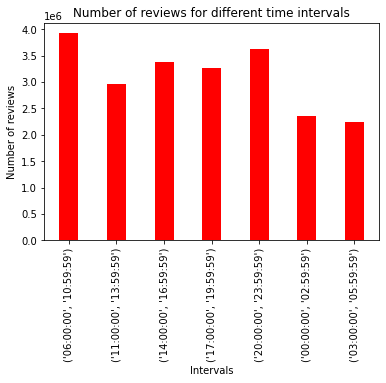

In [ ]:
#apply the funcion previously created using the intervals given in the table as input
intervals_reviews([("06:00:00","10:59:59"),("11:00:00","13:59:59"),("14:00:00","16:59:59"),("17:00:00","19:59:59"),("20:00:00","23:59:59"),("00:00:00","02:59:59")
,("03:00:00","05:59:59")])

### [RQ6] It's time to get information from the updates that a user does to his reviews.





*   What is the average time (days and minutes) a user lets pass before he updates a review?



In [ ]:
import math
# create a new column that contains the absolute value of the difference between the values of "timestamp_created" and "timestamp_updated"
df['time_before_update']= abs(df.timestamp_created- df.timestamp_updated)
# mean of the values in the column
mean=df.time_before_update.mean()
# calculation of the corresponding number of days (the timestamp is expressed in seconds and in a day there are 86400 seconds )
days=math.floor(mean/86400)
# calculation of the corresponding minutes of the remaning time
minutes=int((mean-(86400*days))/60)
print("the average time a user lets pass before he updates a review is: "+str(days)+" days and "+str(minutes)+" minutes")

the average time a user lets pass before he updates a review is: 36 days and 213 minutes




*   Plot the top 3 authors that usually update their reviews.



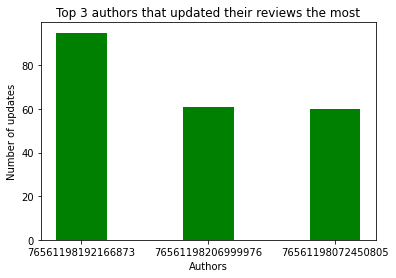

In [ ]:
# get only the rows of the reviews that have the timestamp of the creation different to the timestamp of the update
# group by the authors and count the number of reviews updated by each author
# sort the values in descending order and get the top 3
top3=df.loc[df.timestamp_created != df.timestamp_updated].groupby("author.steamid")["review_id"].count().sort_values(ascending=False)[0:3]
# plot the result
plt.bar(list(map(str,top3.keys())), top3, color ='green',
        width = 0.4)
plt.xlabel("Authors")
plt.ylabel("Number of updates")
plt.title("Top 3 authors that updated their reviews the most")
plt.show()

### TQ1


1) This algorithm gets the k-ith element of the ordered list 
(at every iteration you do the ordering of the new list using the random value "s")

2) We have the worst case of this algorithm when at every iteration when:
  
  s: is always the second maximum value of the list

  k: is 1

  In this case, every time, the list will be reduced of 1 length until it will reach the length of 1.
  
  In this way the computational cost will be equal to the length of the list at each iteration
  
  O(n)+O(n-1)+O(n-2)..... = O(n^2)

3) We have the best case of this algorithm when k = r at the first iteration.
	in this case the computational cost correspond to the length of the list: n
	so is O(n)

### TQ2

1) The computational cost of the function swapList is O(n/2) 
and the cost of each call at the function splitSwap is T(n/2)
So the total computational cost will be: T(n/2) + T(n/2) + O(n/2) + 1

2) This algorithm reverses the position of "n" elements, skipping the first "l" ones.
In the case proposed in the previous exercise (l = 0), the algorithm simply reverse the order of the first "n" elements.
The values choose for "l" and "n" have to follow this condition: l + n <= len(a)
If the previous condition is not followed, the algorithm will raise an "out of range" error.

Example of execution:
a=[1,3,5,7]
l=0
n=4
- the first call to splitSwap operates on the first half of the list --> [1,3]
	- in this case both calls to splitSwap are executed but won't do anything, because the length of the list will be 1
	- apply swapList that reverse the order --> [3,1]
- the second call to splitSwap operates on the second half of the list --> [5,7]
	- in this case both calls to splitSwap are executed but won't do anything, because the length of the list will be 1
	- apply swapList that reverse the order --> [7,5]
- apply swapList on the complete list that has been modified by the previous recursion call
	the list is now [3,1,5,7] and applying the function will be --> [7,5,3,1]